# 题目：根据银行顾客的信息判断顾客是否会申请存款 
### 数据来源：https://signate.jp/competitions/1/data
### 孟陈锐 2020/04/20






##  数据前处理
- 删除不需要考虑的column：column0-17中，暂时不考虑marital（需要三维向量分析且与是否想存款关系不太大），job（职业种类过多），contact（没有关系），poutcome（unknown太多）。
- 将特征信息转化为数字：见train_Transform
- 数据标准化和归一化后：见train_Normalization

In [17]:
# 老三样
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(27128, 14)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E213CD75C8>,
      dtype=object)

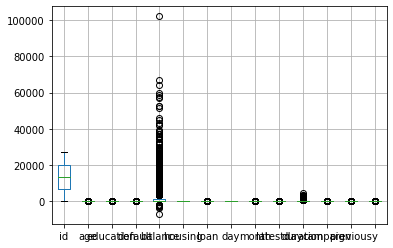

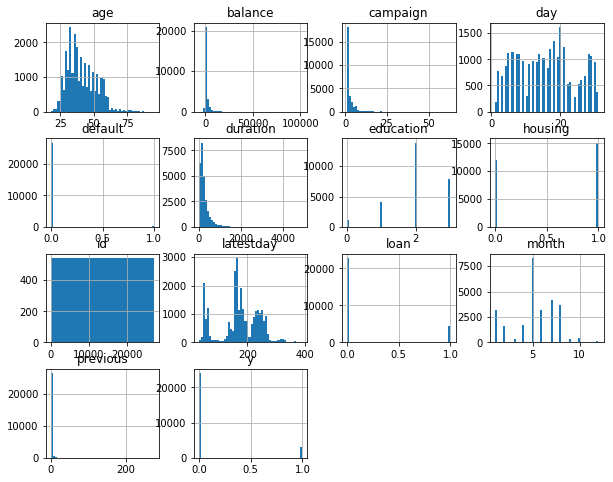

In [18]:
#导入数据：train_Transform
df = pd.read_csv("train_Transform.csv")
print(df.shape)
df.boxplot()
df.isnull().sum() #检测是否有数据缺损
df.describe()
df.hist(bins=50,figsize=(10,8))

In [ ]:
#查看各个数据分布和关联





### 1.1 数据标准化和归一化处理
- age:归一化
- education：归一化
- default：不需要处理
- balance：符合正态分布，标准化+归一化
- housing：不需要处理
- loan：不需要处理
- latestday:归一化
- duration：符合正态分布，标准化+归一化
- campaign：符合正态分布，标准化+归一化
- previous：符合正态分布，标准化+归一化


In [19]:
#标准化和归一化处理:分三类df处理
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Normalization_df=df[["age","education","latestday"]]
StNormalization_df=df[["balance","duration","campaign","previous"]]
notransform_df=df[["default","housing","loan"]]

#第一部分，归一化
minmaxscaler = MinMaxScaler()
minmaxscaler = minmaxscaler.fit(Normalization_df)
Normalization_data=minmaxscaler.transform(Normalization_df)
print(Normalization_data.shape)

#第二部分，标准化+归一化
standard_data=StandardScaler().fit_transform(StNormalization_df)
standard_data
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(standard_data)
StNormalization_data=minmaxscaler.transform(standard_data)
print(StNormalization_data.shape)

#第三部分，不做改动
print(notransform_df.shape)

(27128, 3)
(27128, 4)
(27128, 3)


In [4]:
#组合处理好的三个部分
train_Normalization=df
train_Normalization[["age","education","latestday"]]=Normalization_data
train_Normalization[["balance","duration","campaign","previous"]]=StNormalization_data
train_Normalization

#去掉id这一列——形成train_x和train_y
train_Normalization=train_Normalization.drop(columns="id")
train_Normalization

,age,education,default,balance,housing,loan,day,month,latestday,duration,campaign,previous,y
0,0.272727,0.666667,0,0.078945,1,0,3,4,0.253482,0.190931,0.000000,0.000000,1
1,0.428571,0.333333,0,0.076073,0,0,18,2,0.128134,0.034974,0.145161,0.000000,1
2,0.233766,1.000000,0,0.066832,0,0,13,4,0.281337,0.115291,0.000000,0.007273,1
3,0.584416,0.666667,0,0.067181,0,0,25,1,0.064067,0.086011,0.000000,0.000000,1
4,0.168831,1.000000,0,0.066080,0,0,30,4,0.328691,0.102074,0.000000,0.007273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,0.311688,0.333333,0,0.076183,1,0,2,2,0.083565,0.056730,0.016129,0.007273,0
27124,0.207792,0.666667,0,0.069429,1,0,15,5,0.370474,0.073607,0.032258,0.000000,0
27125,0.233766,0.333333,0,0.063281,1,0,8,5,0.350975,0.082351,0.000000,0.000000,0
27126,0.194805,0.333333,0,0.064749,0,0,12,8,0.612813,0.015453,0.048387,0.000000,0


In [5]:
#随机生成训练数据和测试数据
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X=train_Normalization[["age","education","default","balance","housing","loan","latestday","duration","campaign","previous"]]
y=train_Normalization[["y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_train, y_train)
print(X_train.shape)
print(y_train.shape)

(21702, 10)
(21702, 1)


c:\users\孟玉红\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [8]:
#单独使用决策树
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5,min_impurity_split=0.1)
clf = clf.fit(X_train, y_train)

# ## Visualization 可视化
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

c:\users\孟玉红\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


In [10]:
#使用测试数据，测试决策树
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,clf.predict(X_test)))

[[4580  211]
 [ 376  259]]


AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_score_'

什么鬼= =！ 预测错的比对的还多

In [12]:
#决策树，SVM，逻辑回归和KNN一起上！
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# scores = []
# for clf in [DecisionTreeClassifier(), SVC(), LogisticRegression(), KNeighborsClassifier()]:
#     clf_scores = []
#     for train_index, validation_index in skf.split(X_train, y_train):
#         X_cross_train, X_validation = X_train[train_index], X_train[validation_index]
#         y_cross_train, y_validation = y_train[train_index], y_train[validation_index]
        
#         clf = clf.fit(X_cross_train, y_cross_train)
#         clf_scores.append(accuracy_score(y_validation, clf.predict(X_validation)))
#     scores.append(clf_scores)

In [13]:
#单独使用逻辑回归
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(confusion_matrix(y_test,clf.predict(X_test)))

[[4702   66]
 [ 560   98]]


c:\users\孟玉红\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


居然还不如决策树= =!

In [66]:
#单独使用SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = SVC(gamma="auto",C=0.01,class_weight="balanced")
#clf = GridSearchCV(clf, {"kernel":['linear'], 'C':[0.01,0.005,0.008]}, cv=3)
clf.fit(X_train, y_train)

c:\users\孟玉红\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
clf.best_estimator_
clf.best_score_

AttributeError: 'SVC' object has no attribute 'best_estimator_'

In [67]:
print(confusion_matrix(y_test,clf.predict(X_test)))

[[2818 1983]
 [ 234  391]]


！！！ WTF！

In [15]:
#单独使用KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print(confusion_matrix(y_test,neigh.predict(X_test)))

c:\users\孟玉红\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


[[4521  247]
 [ 473  185]]


In [13]:
#使用随机森林
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

X_train, y_train = make_classification(n_features=10,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(confusion_matrix(y_test,clf.predict(X_test)))

[[   0 4791]
 [   0  635]]


In [35]:
#使用gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
X_train, y_train = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [800,900,1000],
    'max_features': ['log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                    

In [36]:
print (CV_rfc.best_params_)
print (CV_rfc.best_score_)
print(confusion_matrix(y_test,CV_rfc.predict(X_test)))

{'max_features': 'log2', 'n_estimators': 900}
0.9019999999999999
[[4264  527]
 [ 579   56]]
